In [1]:
import stdpopsim
import tskit
import msprime
from IPython.display import display
import tskit_arg_visualizer
import numpy as np

/Users/murillor/opt/anaconda3/envs/union/lib/python3.10/site-packages/stdpopsim/catalog/HomSap/demographic_models.py:158: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  time=int(extended_GF.time.head(1) - 1), rate=0
/Users/murillor/opt/anaconda3/envs/union/lib/python3.10/site-packages/stdpopsim/catalog/HomSap/demographic_models.py:161: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  time=int(extended_GF.time.tail(1) + 1), rate=0


In [2]:
%%javascript
var script = document.createElement('script');
script.type = 'text/javascript';
script.src = 'https://d3js.org/d3.v7.min.js';
document.head.appendChild(script);

<IPython.core.display.Javascript object>

In [3]:
ts = msprime.sim_ancestry(samples=4, ploidy=1, population_size=50000, recombination_rate=5e-8, sequence_length=200, random_seed=123, record_full_arg=True)
ts = msprime.sim_mutations(ts, rate=5e-8, random_seed=12345)

In [4]:
tss = ts.simplify()

In [5]:
ts

In [6]:
tss

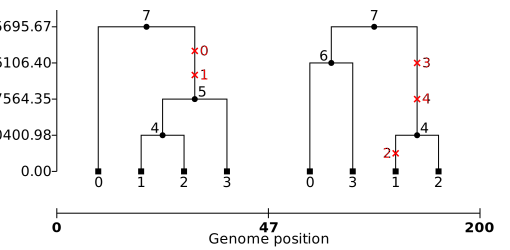

In [7]:
svg_size = (500, 250) # Height and width for the SVG: optional but useful for this notebook
svg_string = tss.draw_svg(
    path="example_ts.svg",
    size=svg_size,
    y_axis=True, y_label=" ",  # optional: show a time scale on the left
    time_scale="rank", x_scale="treewise", canvas_size=(svg_size[0]+10, svg_size[1]), style=".tree-sequence {transform: translateX(10px)}"# Force same axis settings as the text view
)
display(svg_string)

In [8]:
tss.tables.edges

id,left,right,parent,child,metadata
0,0,200,4,1,
1,0,200,4,2,
2,0,47,5,3,
3,0,47,5,4,
4,47,200,6,0,
5,47,200,6,3,
6,0,47,7,0,
7,47,200,7,4,
8,0,47,7,5,
9,47,200,7,6,


In [9]:
tss.tables.nodes

id,flags,population,individual,time,metadata
0,1,0,0,0.00000000,
1,1,0,1,0.00000000,
2,1,0,2,0.00000000,
3,1,0,3,0.00000000,
4,0,0,-1,10400.97834031,
5,0,0,-1,87564.35114390,
6,0,0,-1,96106.40092689,
7,0,0,-1,115695.67326147,


In [10]:
tss.tables.sites

id,position,ancestral_state,metadata
0,1,T,
1,21,G,
2,63,T,
3,130,G,
4,149,T,


In [11]:
tss.tables.mutations

id,site,node,time,derived_state,parent,metadata
0,0,5,95764.69873733,C,-1,
1,1,5,98781.54806245,T,-1,
2,2,1,1359.48373362,G,-1,
3,3,4,81679.72997120,T,-1,
4,4,4,39253.99752936,G,-1,


In [12]:
tss.genotype_matrix()

array([[0, 1, 1, 1],
       [0, 1, 1, 1],
       [0, 1, 0, 0],
       [0, 1, 1, 0],
       [0, 1, 1, 0]], dtype=int32)

In [13]:
demography = msprime.Demography()
demography.add_population(name="A", initial_size=10_000)
demography.add_population(name="B", initial_size=100)
demography.add_population(name="C", initial_size=100_000)
demography.add_population_split(time=100_000, derived=["A", "B"], ancestral="C")

PopulationSplit(time=100000, derived=['A', 'B'], ancestral='C')

In [14]:
ts1 = msprime.sim_ancestry(samples={"A":4}, ploidy=1, demography=demography, sequence_length=50, recombination_rate=1e-6, random_seed=123)

In [15]:
ts2 = msprime.sim_ancestry(samples={"B":4}, ploidy=1, demography=demography, sequence_length=50, recombination_rate=1e-6, random_seed=1)

In [16]:
ts1

In [17]:
ts2

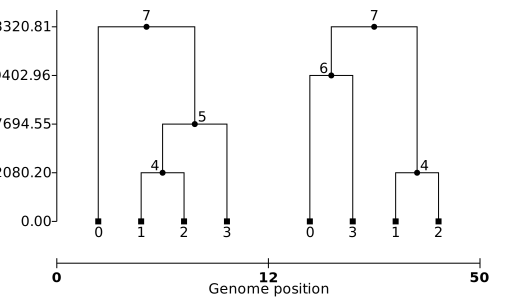

In [18]:
svg_size = (500, 300) # Height and width for the SVG: optional but useful for this notebook
svg_string = ts1.draw_svg(
    path="ts1.svg",
    size=svg_size,
    y_axis=True, y_label=" ",  # optional: show a time scale on the left
    time_scale="rank", x_scale="treewise", canvas_size=(svg_size[0]+10, svg_size[1]), style=".tree-sequence {transform: translateX(10px)}"  # Force same axis settings as the text view
)
display(svg_string)

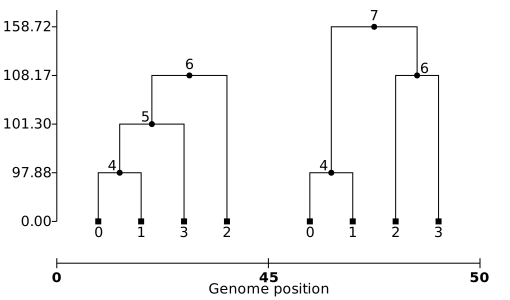

In [19]:
svg_size = (500, 300) # Height and width for the SVG: optional but useful for this notebook
svg_string = ts2.draw_svg(
    path="ts2.svg",
    size=svg_size,
    y_axis=True, y_label=" ",  # optional: show a time scale on the left
    time_scale="rank", x_scale="treewise", canvas_size=(svg_size[0]+10, svg_size[1]), style=".tree-sequence {transform: translateX(10px)}"  # Force same axis settings as the text view
)
display(svg_string)

In [20]:
tsu = ts1.union(ts2, node_mapping=np.full(ts2.num_nodes, tskit.NULL), add_populations=False)

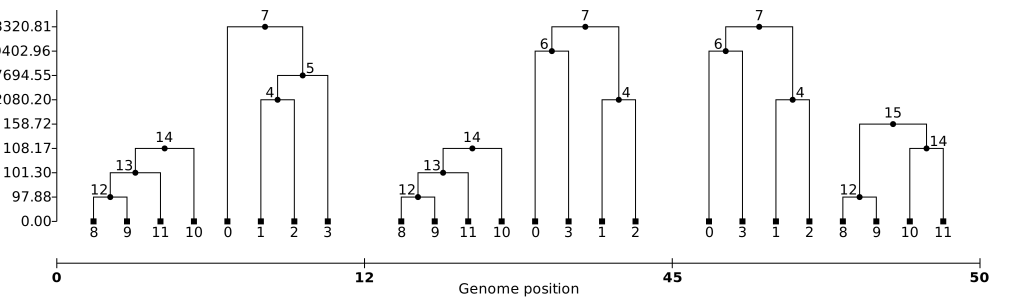

In [21]:
svg_size = (1000, 300) # Height and width for the SVG: optional but useful for this notebook
svg_string = tsu.draw_svg(
    path="tsu.svg",
    size=svg_size,
    y_axis=True, y_label=" ",  # optional: show a time scale on the left
    time_scale="rank", x_scale="treewise", canvas_size=(svg_size[0]+10, svg_size[1]), style=".tree-sequence {transform: translateX(10px)}"  # Force same axis settings as the text view
)
display(svg_string)

In [22]:

tsu_recap = msprime.sim_ancestry(initial_state = tsu, demography=demography, random_seed=3)

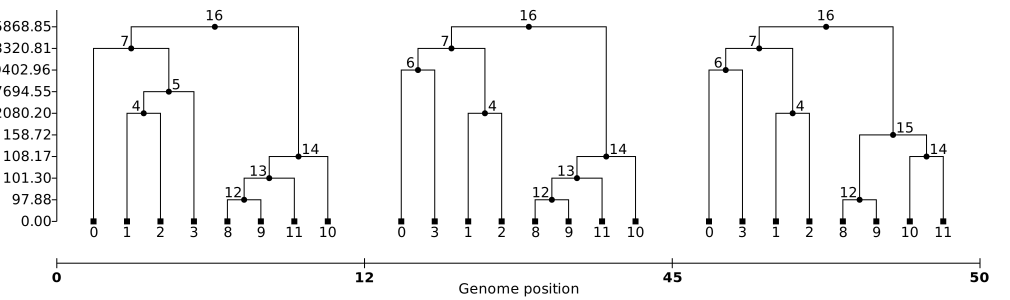

In [23]:
svg_size = (1000, 300) # Height and width for the SVG: optional but useful for this notebook
svg_string = tsu_recap.draw_svg(
    path="tsu_recap.svg",
    size=svg_size,
    y_axis=True, y_label=" ",  # optional: show a time scale on the left
    time_scale="rank", x_scale="treewise", canvas_size=(svg_size[0]+10, svg_size[1]), style=".tree-sequence {transform: translateX(10px)}",  # Force same axis settings as the text view
)
display(svg_string)